In [1]:
#import 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Naive Bayes Classifier

In [2]:


def eval_metrics(y_true, y_pred):

    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
    prec = precision_score(y_true, y_pred, average='binary', pos_label='1')
    f1 = f1_score(y_true, y_pred, average='binary', pos_label='1')
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred, average='binary', pos_label='1')
    cm_display.plot()
    plt.show()
    
    return prec, f1, acc, rec



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def pre_processing(df):

    # Pre-processing
    
    df = df.drop(['id'], axis=1)
    
    df = df.dropna()
    
    #Convert int to categorical types
    df['gender'] = df['gender'].astype('object')
    df['hypertension'] = df['hypertension'].astype('object')
    df['heart_disease'] = df['heart_disease'].astype('object')
    df['ever_married'] = df['ever_married'].astype('object')
    df['Residence_type'] = df['Residence_type'].astype('object')
    df['smoking_status'] = df['smoking_status'].astype('object')
    df['work_type'] = df['work_type'].astype('object')
    df['stroke'] = df['stroke'].astype('object')

    
    #convert age to categorical
    df['age'] = pd.cut(df.age,bins=[0,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
    df['bmi'] = pd.cut(df.bmi,bins=[10,18.5, 25, 30, 35, 40, 100], labels = ['underweight', 'healthy weight', 'overweight', 
                                                                              'obesity class 1', 'obesity class 2', 'obesity class 3'])
    df['avg_glucose_level'] = pd.cut(df.avg_glucose_level, bins=[50, 80, 115, 150, 180, 215, 250, 280])
    
    
    
    df['age'] = df['age'].astype('object')
    df['bmi'] = df['bmi'].astype('object')
    df['avg_glucose_level'] = df['avg_glucose_level'].astype('object')
    
    #partioning data into features and target
        
    df=df.astype(str)
    
    X = df.drop([df.columns[-1]], axis = 1)
    
    y = df[df.columns[-1]]
    
    
    return X, y

In [5]:
class  NaiveBayes:

    def __init__(self):

        self.features = list
        self.likelihoods = {}
        self.class_priors = {}
        self.pred_priors = {}

        self.X_train = np.array
        self.y_train = np.array
        self.train_size = int
        self.num_feats = int

    def fit(self, X, y):

        self.features = list(X.columns)
        self.X_train = X
        self.y_train = y
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        for feature in self.features:
            self.likelihoods[feature] = {}
            self.pred_priors[feature] = {}

            for feat_val in np.unique(self.X_train[feature]):
                self.pred_priors[feature].update({feat_val: 0})

                for outcome in np.unique(self.y_train):
                    # print(type(outcome))
                    self.likelihoods[feature].update({feat_val+ '_' + outcome:0})
                    self.class_priors.update({outcome: 0})

        self._calc_class_prior()
        self._calc_likelihoods()
        self._calc_predictor_prior()

    def _calc_class_prior(self):

        for outcome in np.unique(self.y_train):
            outcome_count = sum(self.y_train == outcome)
            self.class_priors[outcome] = outcome_count / self.train_size

    def _calc_likelihoods(self):

        for feature in self.features:

            for outcome in np.unique(self.y_train):
                outcome_count = sum(self.y_train == outcome)
                feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

                for feat_val, count in feat_likelihood.items():
                    self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


    def _calc_predictor_prior(self):


        for feature in self.features:
            feat_vals = self.X_train[feature].value_counts().to_dict()

            for feat_val, count in feat_vals.items():
                self.pred_priors[feature][feat_val] = count/self.train_size

    def _calc_predictor_prior_complement(self):


            for feature in self.features:
                feat_vals = self.X_train[feature].value_counts().to_dict()

                for feat_val, count in feat_vals.items():
                    self.pred_priors[feature][feat_val] = count/self.train_size
                    
    def predict(self, X):

        """ Calculates Posterior probability P(c|x) """

        results = []
        X = np.array(X)

        for query in X:
            probs_outcome = {}
            for outcome in np.unique(self.y_train):
                prior = self.class_priors[outcome]
                likelihood = 1
                evidence = 1

                for feat, feat_val in zip(self.features, query):
                    likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
                    evidence *= self.pred_priors[feat][feat_val]

                posterior = (likelihood * prior) / (evidence)

                probs_outcome[outcome] = posterior

            result = max(probs_outcome, key = lambda x: probs_outcome[x])
            results.append(result)

        return np.array(results)
    
    def predict_complement(self, X):

        """ Calculates Posterior probability P(c|x) """

        results = []
        X = np.array(X)

        for query in X:
            probs_outcome = {}
            for outcome in np.unique(self.y_train):
                prior = self.class_priors[outcome]
                likelihood = 1
                evidence = 1

                for feat, feat_val in zip(self.features, query):
                    likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
                    evidence *= self.pred_priors[feat][feat_val]

                posterior = 1 / ((likelihood * prior) / (evidence))

                probs_outcome[outcome] = posterior

            result = min(probs_outcome, key = lambda x: probs_outcome[x])
            results.append(result)

        return np.array(results)



Stroke Dataset:


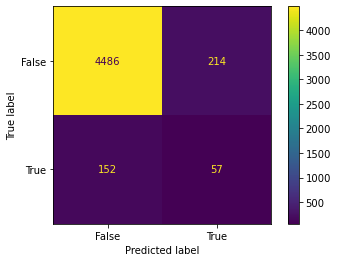

Accuracy: 0.92544306376044
Precision: 0.21033210332103322
f-1 score: 0.23749999999999996
recall: 0.2727272727272727
Query 1:- [['Male' '(65, 70]' '0' '1' 'No' 'Private' 'Urban' '(215, 250]'
  'obesity class 2' 'formerly smoked']] ---> ['0']
Query 2:- [['Female' '(75, 80]' '1' '1' 'Yes' 'Govt_job' 'Urban' '(180, 215]'
  'obesity class 1' 'smokes']] ---> ['1']


In [6]:


#Weather Dataset
print("\nStroke Dataset:")

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df1 = df

#Split fearures and target
X,y  = pre_processing(df)

nb_clf = NaiveBayes()
nb_clf.fit(X, y)

#Evaluate the model
prec, f1, acc, rec = eval_metrics(y, nb_clf.predict(X))

print("Accuracy: {}".format(acc))
print("Precision: {}".format(prec))
print("f-1 score: {}".format(f1))
print("recall: {}".format(rec))

#     print(X)
#     print(y)

#Query 1:
query = np.array([['Male','(65, 70]', '0', '1', 'No', 'Private', 'Urban', '(215, 250]', 'obesity class 2', 'formerly smoked']])
print("Query 1:- {} ---> {}".format(query, nb_clf.predict(query)))

#Query 2:
query = np.array([['Female','(75, 80]', '1', '1', 'Yes', 'Govt_job', 'Urban', '(180, 215]', 'obesity class 1', 'smokes']])
print("Query 2:- {} ---> {}".format(query, nb_clf.predict(query)))


# GUI for Naive Bayes Classifier

In [6]:
from tkinter import *
 
# user defined function
def predict_stroke():
    try:
        
        x1 = int(gender.get())
        x2 = float(age.get())
        x3 = int(hypertension.get())
        x4 = int(heart_disease.get())
        x5 = int(ever_married.get())
        x6 = int(work_type.get())
        x7 = int(Residence_type.get())
        x8 = float(avg_glucose_level.get())
        x9 = float(bmi.get())
        x10 = int(smoking_status.get())
        
        #Convert to strings
        
        #gender
        if x1 == 0:
            x1 = "Male"
        elif x1 == 1:
            x1 = "Female"
        else:
            x1 = "Others" 
        
        #ever married
        if x5 == 0:
            x5 = "No"
        else:
            x5 = "Yes"
        
        #work type
        if x6 == 0:
            x6 = "Private"
        elif x6 == 1:
            x6 = "Self-employed"
        elif x6 == 2:
            x6 = "Govt_job"
        elif x6 == 3:
            x6 = "Children"
        else:
            x6 = "Never_worked"
        
        #residence
        if x7 == 0:
            x7 = "Urban"
        else:
            x7 = "Rural"
            
        #smoking status
        if x10 == 0:
            x10 = "formerly smoked"
        elif x10 == 1:
            x10 = "never smoked"
        elif x10 == 2:
            x10 = "smokes"
        else:
            x10 = "Unknown"
        
        #age
        df1 = df.dropna()
        df1.bmi
        
        age_interval = pd.cut(df1.age,bins=[0,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85])
        
        age_range = age_interval.unique()
        temp_x2 = ''
        
        for rang in age_range:
            if x2 in rang:
                temp_x2 = str(rang)
        
        x2 = temp_x2
        
        #bmi 
        bmi_interval = pd.cut(df1.bmi,bins=[10,18.5, 25, 30, 35, 40, 100])
        bmi_range = bmi_interval.unique()
        bmi_labels = ['obesity class 2', 'obesity class 1', 'healthy weight', 'overweight', 'obesity class 3', 'underweight']

        temp_x9 = ''

        for i in range(len(bmi_range)):
            if x9 in bmi_range[i] :
                temp_x9 = bmi_labels[i]

        x9 = temp_x9


        #avg_glucose
        
        glucose_interval = pd.cut(df1.avg_glucose_level, bins=[50, 80, 115, 150, 180, 215, 250, 280])
        
        glucose_range = glucose_interval.unique()
        temp_x8 = ''

        for rang in glucose_range:
            if x8 in rang:
                temp_x8 = str(rang)

        x8 = temp_x8

        
        #new_X = np.array([gender.get(), age.get(), hypertension.get(), heart_disease.get(), ever_married.get(), 
        #                  work_type.get(), Residence_type.get(), avg_glucose_level.get(), bmi.get(), smoking_status.get()])
        new_X = np.array([[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]])

        new_pred = nb_clf.predict(new_X)
        
        stroke_class = int(new_pred[0])
        
        #print(stroke_class)
        #print(new_X)
        if stroke_class == 1:
            result.set("The patient IS at risk of having a stroke")
            
        elif stroke_class == 0:
            result.set("The patient is NOT at risk of having a stroke")

    except:
        result.set("something went wrong")

        
# object of tkinter
# with background set to light grey
master = Tk()
master.configure(bg='white')
master.title("Stroke Predictor Application")
 
# Variable Classes in tkinter
result = StringVar();
 
# App introduction
Label(master, text="This application allows you to check a patient's risk of stroke based on the following parameters." , bg = "white", font=("Arial", 12)).grid(row=1, sticky=W)
Label(master, text="Please enter your information in the following format, and hit the predict button. " , bg = "white", font=("Arial", 12)).grid(row=2, sticky=W)
Label(master, text="This prediction makes use of Complement Naive Bayes, which got 93% accuracy after evaluating 3 models." , bg = "white", font=("Arial", 12)).grid(row=3, sticky=W)
Label(master, text="" , bg = "white", font=10).grid(row=4, sticky=W)
Label(master, text="Input each one of the patient's information in the boxes below:" , bg = "white", font=("Arial", 12)).grid(row=5, sticky=W)
    
# Creating label for each information
# name using widget Label
Label(master, text="Enter gender (0: Male, 1: Female, 2: Others): " , bg = "white", font=("Arial", 12)).grid(row=6, sticky=W)
Label(master, text="Enter age (year-old): " , bg = "white", font=("Arial", 12)).grid(row=7, sticky=W)
Label(master, text="Enter hypertension (0: patient has no hypertension, 1: patient has hypertension): " , bg = "white", font=("Arial", 12)).grid(row=8, sticky=W)
Label(master, text="Enter heart_disease (0: patient has no heart disease, 1: patient has heart disease): " , bg = "white", font=("Arial", 12)).grid(row=9, sticky=W)
Label(master, text="Enter ever_married (0: Yes, 1: No): " , bg = "white", font=("Arial", 12)).grid(row=10, sticky=W)
Label(master, text="Enter work_type (0: Private, 1: Self-employed, 2: Govt_jov, 3: Children, 4: Never_worked): " , bg = "white", font=("Arial", 12)).grid(row=11, sticky=W)
Label(master, text="Enter Residence_type (0: Urban, 1: Rural): " , bg = "white", font=("Arial", 12)).grid(row=12, sticky=W)
Label(master, text="Enter average glucose level in blood: " , bg = "white", font=("Arial", 12)).grid(row=13, sticky=W)
Label(master, text="Enter body mass index, BMI: " , bg = "white", font=("Arial", 12)).grid(row=14, sticky=W)
Label(master, text="Enter smoking_status (0: formerly smoked, 1: never smoked, 2: smokes, 3: Unknown): " , bg = "white", font=("Arial", 12)).grid(row=15, sticky=W)

# label for the result
Label(master, text=" ", bg = "white", font=("Arial", 12)).grid(row=16, sticky=W)
Label(master, text="Result :", bg = "white", font=("Arial", 17)).grid(row=17, sticky=W)
 
# Output the result
Label(master, text="", textvariable=result ,bg = "white", font=("Arial", 17)).grid(row=17,column=1, sticky=W)

# store variables
gender = Entry(master,width = 30)
gender.grid(row=6, column=1)
age = Entry(master,width = 30)
age.grid(row=7, column=1)
hypertension = Entry(master,width = 30)
hypertension.grid(row=8, column=1)
heart_disease = Entry(master,width = 30)
heart_disease.grid(row=9, column=1)
ever_married = Entry(master,width = 30)
ever_married.grid(row=10, column=1)
work_type = Entry(master,width = 30)
work_type.grid(row=11, column=1)
Residence_type = Entry(master,width = 30)
Residence_type.grid(row=12, column=1)
avg_glucose_level = Entry(master,width = 30)
avg_glucose_level.grid(row=13, column=1)
bmi = Entry(master,width = 30)
bmi.grid(row=14, column=1)
smoking_status = Entry(master,width = 30)
smoking_status.grid(row=15, column=1)

 
# creating a button using the widget 
b = Button(master, text="Predict", command=predict_stroke, bg = "white", font=("Arial", 12))
b.grid(row=16, column=1,columnspan=1, rowspan=1,padx=5, pady=5,)
 
mainloop()


# Constructing Decision Tree Classification Models

In [8]:
import numpy as np
from collections import Counter

# class implementing a tree node.
class Node:
    # contructor to hold data about the feature, threshold, data going left and right, 
    # information gain, and the leaf node value.
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

In [72]:
# Decision Tree Class which implements a decision tree classifier algorithm.
# In this case, it is ID3 algorithm where entropy and information gain is used to split the branches.
class DecisionTree:
    
    # a contructor to hold values for min_samples_split and max_depth of the tree.
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split  # specify a minimum number of samples required to split a node
        self.max_depth = max_depth                  # specifies a maximum depth of a tree
        self.root = None
        
    @staticmethod
    
    # a function to calculate entropy from a list of integer values
    def _entropy(s): # @param s: input vector

        # convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        
        # probabilities of each class label
        percentages = counts / len(s)

        # caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        
        # return: float, entropy value
        return -entropy   
    
    # a function to calculate information gain 
    def _information_gain(self, parent, left_child, right_child):  
                               # @param parent: list, the parent node
                               # @param left_child: list, left child of a parent
                               # @param right_child: list, right child of a parent
                                
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        # calculate information gain using entropy of parent and children nodes
        # return: float, information gain
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))
    
    # best-split function to calculate the best splitting parameters for input features X and a target variable y
    def _best_split(self, X, y):    # @param X: np.array, features
                                    # @param y: np.array or list, target

        # initializations
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        
        # for every dataset feature
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            # for every unique value of that feature
            for threshold in np.unique(X_curr):
                # construct a dataset and split it to the left and right parts,
                # left part includes records lower or equal to the threshold,
                # right part includes records higher than the threshold,
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                # do the calculation only if there's data in both subsets
                if len(df_left) > 0 and len(df_right) > 0:
                    # obtain the value of the target variable for subsets
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    # caclulate the information gain and save the split parameters -
                    # if the current split if better then the previous best
                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {    # save the split info.
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        # return: dict, best-split info
        return best_split
    
    # a recursive function to build a decision tree from the input data
    def _build(self, X, y, depth=0):
            # @param X: np.array, features
            # @param y: np.array or list, target
            # @param depth: current depth of a tree, used as a stopping criteria

        # get dimension of X
        n_rows, n_cols = X.shape
        
        # check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            best = self._best_split(X, y)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    data_left=left, 
                    data_right=right, 
                    gain=best['gain']
                )
        # for leaf node - value is the most common target value 
        # return: Node
        return Node(
            value=Counter(y).most_common(1)[0][0]
        )
    
    # a function to train a decision tree classifier model
    def fit(self, X, y): # @param X: np.array, features
                         # @param y: np.array or list, target

        # call a recursive function to build the tree
        self.root = self._build(X, y)
    
    # a recursive function to predict a single instance (tree traversal)
    def _predict(self, x, tree):  # @param x: single observation
                                  # @param tree: built tree

        # leaf node
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        # go to the left
        if feature_value <= tree.threshold:
            # return: float, predicted class
            return self._predict(x=x, tree=tree.data_left)
        
        # go to the right
        if feature_value > tree.threshold:
            # return: float, predicted class
            return self._predict(x=x, tree=tree.data_right)
    # predict-function to classify new instances.    
    def predict(self, X):   # @param X: np.array, features

        # call the _predict() function for every observation
        # return: np.array, predicted classes
        return [self._predict(x, self.root) for x in X]

# Constructing Random Forest Classification Models

In [10]:
# Random Forest Class
class RandomForest:
    
    # constructor that holds values for the number of trees in the forest, 
    # minimum samples split, and maximum depth
    def __init__(self, num_trees=25, min_samples_split=2, max_depth=5):
        self.num_trees = num_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # store individually trained decision trees as well
        self.decision_trees = []
        
    @staticmethod
    # sample function to perform boostrap sampling for sampling random data in random forest
    def _sample(X, y):  # @param X: np.array, features
                        # @param y: np.array, target       
        # get dimension of X
        n_rows, n_cols = X.shape
        
        # sample with replacement
        samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
        
        # return: tuple (sample of features, sample of target)
        return X[samples], y[samples]
    
    # fit function to train RF classifier
    def fit(self, X, y):    # @param X: np.array, features
                            # @param y: np.array, target
        # start building new trees from a fresh-start
        if len(self.decision_trees) > 0:
            self.decision_trees = []
            
        # build each tree of the forest
        num_built = 0
        while num_built < self.num_trees:
            try:
                clf = DecisionTree(
                    min_samples_split=self.min_samples_split,
                    max_depth=self.max_depth
                )
                # obtain random data sample
                _X, _y = self._sample(X, y)
                # train the model
                clf.fit(_X, _y)
                # save the classifier
                self.decision_trees.append(clf)
                num_built += 1
            except Exception as e:
                continue
    
    # a predict function to predict class labels for new data instances
    def predict(self, X):  # @param X: np.array, new instances to predict

        # make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))
        
        # reshape to find the most common value
        y = np.swapaxes(a=y, axis1=0, axis2=1)
        
        # majority voting for the final prediction
        predictions = []
        for preds in y:
            counter = Counter(preds)
            predictions.append(counter.most_common(1)[0][0])
        # return: array of predicted classes
        return predictions

# Stroke Dataset

In [9]:
# Import stroke data
import pandas as pd
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [10]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Preprocessing

In [5]:
# remove 'id' since it is not a feature and could influence the model
del stroke_df["id"]

In [11]:
# check data type of each attribute
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
# factorize all string (object) type attribute, to have factor attributes for classification
stroke_df["gender"] = pd.factorize(stroke_df["gender"])[0]
stroke_df["ever_married"] = pd.factorize(stroke_df["ever_married"])[0]
stroke_df["work_type"] = pd.factorize(stroke_df["work_type"])[0]
stroke_df["Residence_type"] = pd.factorize(stroke_df["Residence_type"])[0]
stroke_df["smoking_status"] = pd.factorize(stroke_df["smoking_status"])[0]

In [8]:
# check data type of each attribute
stroke_df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [58]:
# check for missing values
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
# missing values imputation
# imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

# impute missing values
stroke_df_imputed = pd.DataFrame(mice_imputer.fit_transform(stroke_df), columns=stroke_df.columns)

# copy just 'bmi' column back into the original df
stroke_df["bmi"] = stroke_df_imputed["bmi"] 

In [60]:
# double check for missing values
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [127]:
# split data
# first, put it in X and y (features and target)
X = stroke_df.drop(['stroke'], axis = 1).to_numpy()
y = stroke_df['stroke'].to_numpy()

# split the dataset into training and testing portions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=7)

# Decision Tree ID3 Classification

In [126]:
# Decision Tree Model
DT_model = DecisionTree()

DT_model.fit(X_train, y_train)

DT_preds = DT_model.predict(X_test)

# ID3 Model Evaluation 

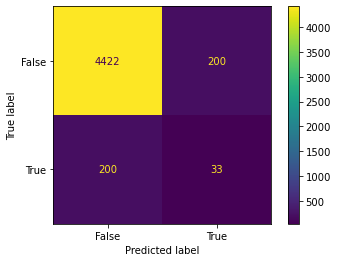

In [74]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, DT_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [75]:
# accuracy score
from sklearn.metrics import accuracy_score
DT_acc = accuracy_score(y_test, DT_preds)

In [76]:
# balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, DT_preds)

0.5491797950834134

In [77]:
# precision score
from sklearn.metrics import precision_score
DT_prec = precision_score(y_test, DT_preds)

In [78]:
# f-1 score
from sklearn.metrics import f1_score
DT_f1 = f1_score(y_test, DT_preds)

In [79]:
# recall score
from sklearn.metrics import recall_score
DT_rec = recall_score(y_test, DT_preds)

In [80]:
print("Accuracy: {}".format(DT_acc))
print("Precision: {}".format(DT_prec))
print("f-1 score: {}".format(DT_f1))
print("recall: {}".format(DT_rec))

Accuracy: 0.917610710607621
Precision: 0.14163090128755365
f-1 score: 0.14163090128755365
recall: 0.14163090128755365


# Random Forest Classification

In [137]:
# trains the model with default hyperparameters and makes predictions on the test set
RF_model = RandomForest()
RF_model.fit(X_train, y_train)

In [138]:
# predict the test data
RF_preds = RF_model.predict(X_test)

# Random Forest Model Evaluation 

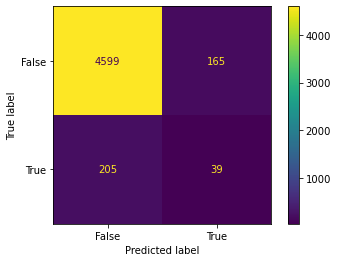

In [139]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, RF_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [140]:
# accuracy score
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test, RF_preds)

In [141]:
# balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, RF_preds)

0.5626006524342404

In [142]:
# precision score
from sklearn.metrics import precision_score
RF_prec = precision_score(y_test, RF_preds)

In [143]:
# f-1 score
from sklearn.metrics import f1_score
RF_f1 = f1_score(y_test, RF_preds)

In [144]:
# recall score
from sklearn.metrics import recall_score
RF_rec = recall_score(y_test, RF_preds)

In [145]:
print("Accuracy: {}".format(RF_acc))
print("Precision: {}".format(RF_prec))
print("f-1 score: {}".format(RF_f1))
print("recall: {}".format(RF_rec))

Accuracy: 0.9261182108626198
Precision: 0.19117647058823528
f-1 score: 0.17410714285714285
recall: 0.1598360655737705


# GUI For Random Forest Classifier

In [40]:
# import modules
from tkinter import *
 
# user defined function
def predict_stroke():
    try:
        
        x1 = int(gender.get())
        x2 = float(age.get())
        x3 = int(hypertension.get())
        x4 = int(heart_disease.get())
        x5 = int(ever_married.get())
        x6 = int(work_type.get())
        x7 = int(Residence_type.get())
        x8 = float(avg_glucose_level.get())
        x9 = float(bmi.get())
        x10 = int(smoking_status.get())
        
        
        #new_X = np.array([gender.get(), age.get(), hypertension.get(), heart_disease.get(), ever_married.get(), 
        #                  work_type.get(), Residence_type.get(), avg_glucose_level.get(), bmi.get(), smoking_status.get()])
        new_X = np.array([[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]])

        new_pred = RF_model.predict(new_X)
        
        stroke_class = int(new_pred[0])
        
        #print(stroke_class)
        #print(new_X)
        if stroke_class == 1:
            result.set("The patient IS at risk of having a stroke")
            
        elif stroke_class == 0:
            result.set("The patient is NOT at risk of having a stroke")

    except:
        result.set("something went wrong")

        
# object of tkinter
# with background set to light grey
master = Tk()
master.configure(bg='white')
master.title("Stroke Predictor Application")
 
# Variable Classes in tkinter
result = StringVar();
 
# App introduction
Label(master, text="This application allows you to check a patient's risk of stroke based on the following parameters." , bg = "white", font=("Arial", 12)).grid(row=1, sticky=W)
Label(master, text="Please enter your information in the following format, and hit the predict button. " , bg = "white", font=("Arial", 12)).grid(row=2, sticky=W)
Label(master, text="This prediction makes use of Random forest, which got 94.9% accuracy after evaluating 3 models." , bg = "white", font=("Arial", 12)).grid(row=3, sticky=W)
Label(master, text="" , bg = "white", font=10).grid(row=4, sticky=W)
Label(master, text="Input each one of the patient's information in the boxes below:" , bg = "white", font=("Arial", 12)).grid(row=5, sticky=W)
    
# Creating label for each information
# name using widget Label
Label(master, text="Enter gender (0: Male, 1: Female, 2: Others): " , bg = "white", font=("Arial", 12)).grid(row=6, sticky=W)
Label(master, text="Enter age (year-old): " , bg = "white", font=("Arial", 12)).grid(row=7, sticky=W)
Label(master, text="Enter hypertension (0: patient has no hypertension, 1: patient has hypertension): " , bg = "white", font=("Arial", 12)).grid(row=8, sticky=W)
Label(master, text="Enter heart_disease (0: patient has no heart disease, 1: patient has heart disease): " , bg = "white", font=("Arial", 12)).grid(row=9, sticky=W)
Label(master, text="Enter ever_married (0: Yes, 1: No): " , bg = "white", font=("Arial", 12)).grid(row=10, sticky=W)
Label(master, text="Enter work_type (0: Private, 1: Self-employed, 2: Govt_jov, 3: Children, 4: Never_worked): " , bg = "white", font=("Arial", 12)).grid(row=11, sticky=W)
Label(master, text="Enter Residence_type (0: Urban, 1: Rural): " , bg = "white", font=("Arial", 12)).grid(row=12, sticky=W)
Label(master, text="Enter average glucose level in blood: " , bg = "white", font=("Arial", 12)).grid(row=13, sticky=W)
Label(master, text="Enter body mass index, BMI: " , bg = "white", font=("Arial", 12)).grid(row=14, sticky=W)
Label(master, text="Enter smoking_status (0: formerly smoked, 1: never smoked, 2: smokes, 3: Unknown): " , bg = "white", font=("Arial", 12)).grid(row=15, sticky=W)

# label for the result
Label(master, text=" ", bg = "white", font=("Arial", 12)).grid(row=16, sticky=W)
Label(master, text="Result :", bg = "white", font=("Arial", 17)).grid(row=17, sticky=W)
 
# Output the result
Label(master, text="", textvariable=result ,bg = "white", font=("Arial", 17)).grid(row=17,column=1, sticky=W)

# store variables
gender = Entry(master,width = 30)
gender.grid(row=6, column=1)
age = Entry(master,width = 30)
age.grid(row=7, column=1)
hypertension = Entry(master,width = 30)
hypertension.grid(row=8, column=1)
heart_disease = Entry(master,width = 30)
heart_disease.grid(row=9, column=1)
ever_married = Entry(master,width = 30)
ever_married.grid(row=10, column=1)
work_type = Entry(master,width = 30)
work_type.grid(row=11, column=1)
Residence_type = Entry(master,width = 30)
Residence_type.grid(row=12, column=1)
avg_glucose_level = Entry(master,width = 30)
avg_glucose_level.grid(row=13, column=1)
bmi = Entry(master,width = 30)
bmi.grid(row=14, column=1)
smoking_status = Entry(master,width = 30)
smoking_status.grid(row=15, column=1)

 
# creating a button using the widget 
b = Button(master, text="Predict", command=predict_stroke, bg = "white", font=("Arial", 12))
b.grid(row=16, column=1,columnspan=1, rowspan=1,padx=5, pady=5,)
 
mainloop()